In [1]:
import os
import pandas as pd

%matplotlib inline
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image

i=0

# Step 1 : Initiating the dataset

Since we don't train the model, we only need one dataset

In [2]:
from PytorchTemplate.datasets.cifar10 import cifar10
names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
mean = (0.485, 0.456, 0.406) # (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)
std = (0.229, 0.224, 0.225)
config = {
    "batch_size" : 32,
    "valid_size" : 0.1,
    "shuffle" : True,
    'num_workers' : 1,
    'pin_memory' : True,
    'mean' : mean,
    'std' : std,
    'root' : "data",
    'debug' : False,
    'prob' : [1,1,1],
    'label_smoothing' : 0
}
train_loader,val_loader = cifar10(**config)

Files already downloaded and verified
Files already downloaded and verified


# Step 2 : Assert the dataloader is working ; Require the images on the device

torch.Size([3, 32, 32])
cat


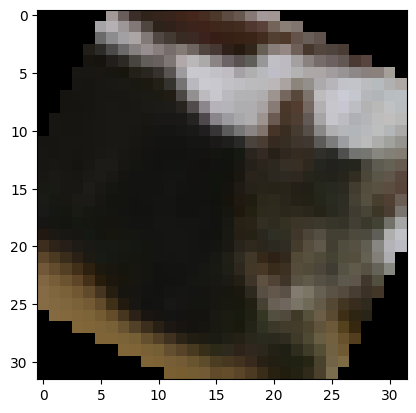

In [13]:

image,label = train_loader.dataset[i]
print(image.shape)


plt.imshow(image.squeeze().permute(1,2,0).numpy())
print(names[torch.argmax(label).item()])
i+=1

# Step 2.2 : We can test the data augmentations !

torch.Size([32, 3, 32, 32])
ship
tensor(-2.1179) tensor(2.6400)


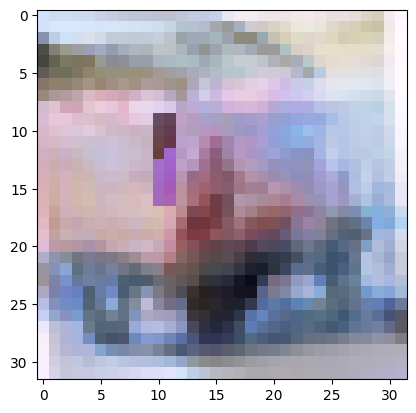

In [4]:
for images,labels in train_loader :
    print(images.shape)
    images,labels = train_loader.dataset.advanced_transform((images,labels))

    break;

print(names[torch.argmax(labels[0]).item()])
plt.imshow(images[0].permute(1,2,0).numpy())
assert torch.min(images)>=0 and torch.max(images)<=1
normalized = train_loader.dataset.normalize(images)
print(torch.min(normalized),torch.max(normalized))

NameError: name 'dataset' is not defined